In [130]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [131]:
train=pd.read_csv('titanic_train.csv')

In [132]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [133]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

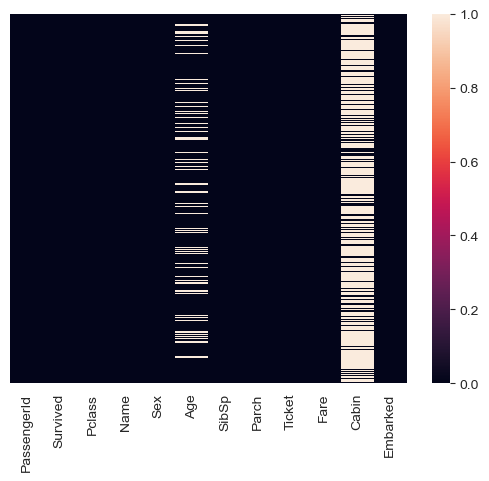

In [134]:
sns.heatmap(train.isnull(),yticklabels=False)

<Axes: xlabel='Survived', ylabel='count'>

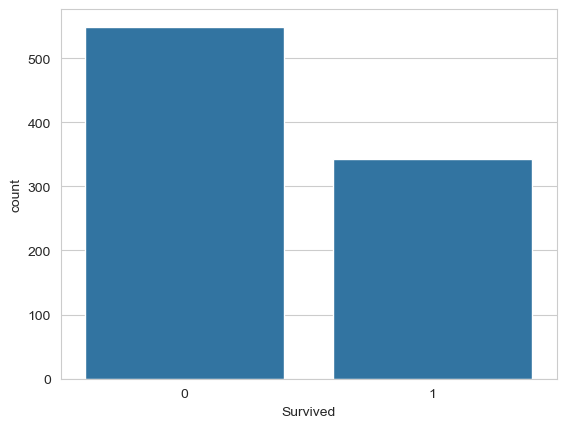

In [135]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<Axes: xlabel='Survived', ylabel='count'>

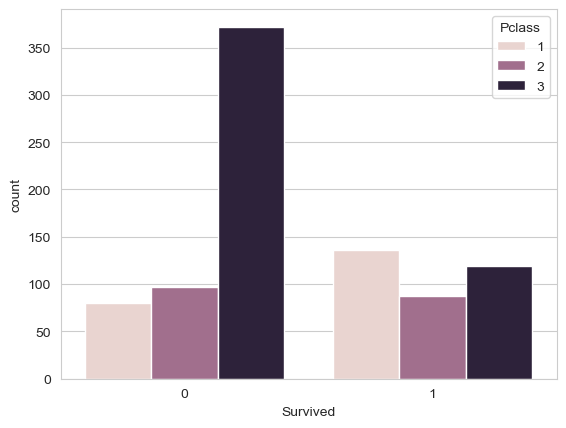

In [136]:
sns.countplot(x='Survived',hue='Pclass',data=train)

<Axes: xlabel='Pclass', ylabel='Age'>

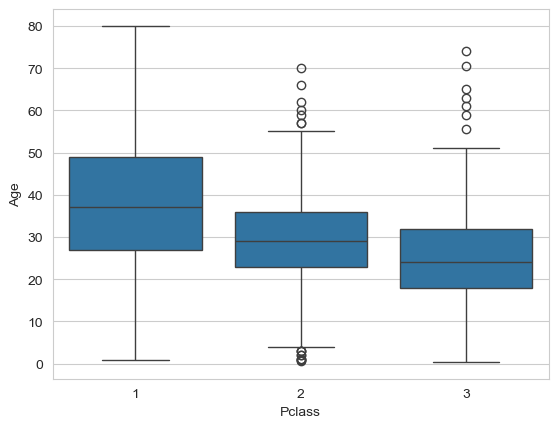

In [137]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [138]:
def impute_data(cols):
    Age =cols[0]
    Pclass=cols[1]
    if pd.isnull(Age): 
       if Pclass--1:
         return 37
       elif Pclass--2:
         return 29
       else:
         return 24
    else:  
        return Age

In [139]:
train['Age'] = train[['Age','Pclass']].apply(impute_data,axis=1)

C:\Users\moham\AppData\Local\Temp\ipykernel_31880\3996415770.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age =cols[0]
C:\Users\moham\AppData\Local\Temp\ipykernel_31880\3996415770.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=cols[1]


<Axes: >

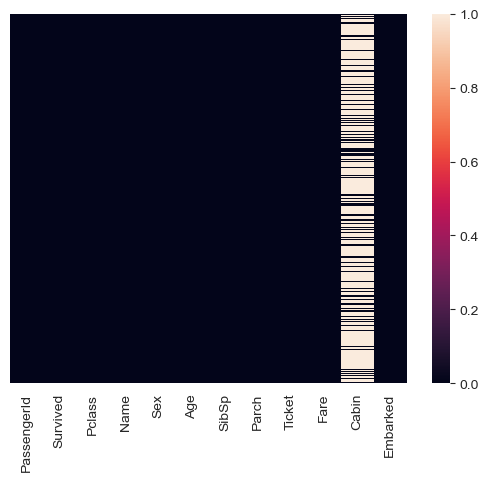

In [140]:
sns.heatmap(train.isnull(),yticklabels=False)

In [141]:
train.dropna(inplace=True)

In [142]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [143]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [144]:
train.drop(['Sex','Name','Embarked','Ticket','Cabin'],axis=1,inplace=True)

In [145]:
train=pd.concat([train,sex,embark],axis=1)

In [146]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,2,1,1,38.0,1,0,71.2833,False,False,False
3,4,1,1,35.0,1,0,53.1000,False,False,True
6,7,0,1,54.0,0,0,51.8625,True,False,True
10,11,1,3,4.0,1,1,16.7000,False,False,True
11,12,1,1,58.0,0,0,26.5500,False,False,True
